In [1]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as st1
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from scipy.special import gamma
from scipy.special import beta
import seaborn as sns

In [2]:
def generate_table_hist(data):
    n_groups = 1+math.floor(math.log(len(data), 2))
    h = abs(max(data)-min(data))/n_groups
    low = np.arange(min(data), max(data), h)
    upp = np.arange(min(data)+h, max(data)+h, h+0.000001)
    med = (low + upp)/2
    table_cut = pd.DataFrame({'values':data, 'groups':pd.cut(data, n_groups)})
    table_hist = table_cut.groupby('groups').count()
    table_hist['abs_freq'] = table_hist['values']
    table_hist['p'] = table_hist['abs_freq']/len(data)
    table_hist['low'] = low
    table_hist['upp'] = upp
    table_hist['med'] = med
    return table_hist

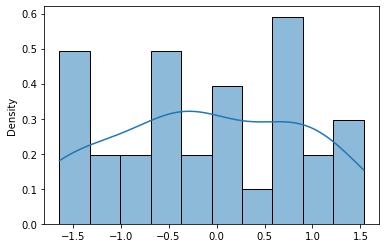

In [3]:
data = np.loadtxt("C:/Users/Danila/Desktop/Статистика/Практика3/ИНБО-06/вариант8/2.txt")
sns.histplot(data, bins = 10, kde = True, stat = "density")
None

# **Нормальное распределение**

In [4]:
def generate_norm(data, n):
    new_data = np.empty(n)
    for i in range(n):
        new_data[i] = np.random.choice(data, 20).mean()
    return new_data
data_n = generate_norm(data, 100)

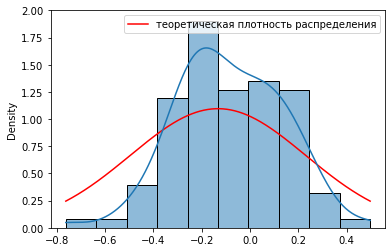

In [7]:
x = np.linspace(min(data_n), max(data_n), 1000)
y = normal_dist(x, x.mean(), x.std())
plt.plot(x, y, c = "red", label = "теоретическая плотность распределения")
plt.legend()
#"практическая плотность распределения"
sns.histplot(data_n, stat = "density", kde = True)
None 

In [6]:
n_groups = 1+math.floor(math.log(len(data_n), 2))
table_hist2 = generate_table_hist(data_n)
def normal_dist(x, mu, q):
    return (1/(q*(2*np.pi)**0.5))*np.exp(-((x-mu)**2)/(2*q**2))
def integrate_norm(upper, Mu, Sd):
    lower = -1000
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = normal_dist(arrx, Mu, Sd)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S
def chisq_test_norm(table_hist_n, mean, sd):
    N = sum(table_hist_n.abs_freq)
    pract = table_hist_n.abs_freq
    theor = np.empty(table_hist_n.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_norm(table_hist_n.upp.iloc[i], mean, sd) - integrate_norm(table_hist_n.low.iloc[i], mean, sd))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Normal dist -",chisq_test_norm(table_hist2, data_n.mean(),data_n.std())<st1.chi2.ppf(0.95, n_groups-2-1))
print(chisq_test_norm(table_hist2, data_n.mean(),data_n.std()),st1.chi2.ppf(0.95, n_groups-1))

Normal dist - True
2.3086391302572657 12.591587243743977


# **Chi^2 распределение**

In [8]:
def generate_chisq(data_N, k):
    new_data = np.empty(len(data))
    Z = np.zeros((k, 30))
    for i in range(k):
        L = np.random.choice(data_N, 30)
        Z[i] =  (L - L.mean())/L.std()
    return sum(Z**2)
k = 30
data_chisq = generate_chisq(data_n, k)
def chisq_dist(x, n):
    return (1/2)**(n/2)/gamma(n/2)*x**(n/2-1)*np.exp(-x/2)

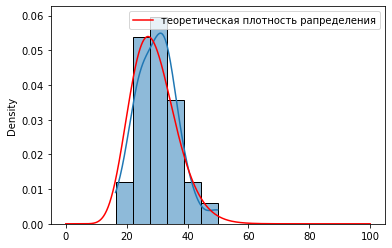

In [9]:
x = np.linspace(0, 100, 1000)
y_chi_teor = chisq_dist(x, k-1)
sns.histplot(data_chisq, stat = "density", kde = True)
plt.plot(x, y_chi_teor, label = "теоретическая плотность рапределения", c = "red")
plt.legend()
None

In [12]:
table_hist3 = generate_table_hist(data_chisq)
def integrate_chisq(upper, k1):
    lower = 0
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = chisq_dist(arrx, k1)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S
def chisq_test_chisq(table_hist_chi, k1):
    N = sum(table_hist_chi.abs_freq)
    pract = table_hist_chi.abs_freq
    theor = np.empty(table_hist_chi.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_chisq(table_hist_chi.upp.iloc[i], k1) - integrate_chisq(table_hist_chi.low.iloc[i], k1))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Chisq dist -",chisq_test_chisq(table_hist3, k1) < st1.chi2.ppf(0.95, n_groups-3))
print(chisq_test_chisq(table_hist3, k1), st1.chi2.ppf(0.95, n_groups-3))

Chisq dist - True
3.101225389190258 9.487729036781154


# **Распределение Фишера**

In [11]:
def generate_fisher(data_n, k1, k2):
    chisq_dist1 = generate_chisq(data_n, k1)
    chisq_dist2 = generate_chisq(data_n, k2)
    fisher_dist = (chisq_dist1/k1)/(chisq_dist2/k2)
    return fisher_dist
def fisher_dist(x, n, m):
    return gamma((n+m)/2)/(gamma(n/2)*gamma(m/2))*(n**(n/2)*m**(m/2)*x**(n/2-1))/((n*x+m)**((n+m)/2))
k1, k2, = 30, 20
fisher_d = generate_fisher(data_n, k1, k2)

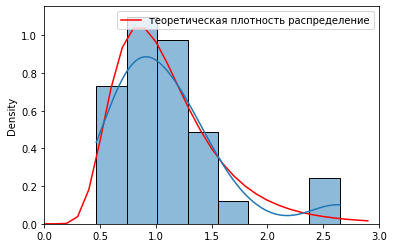

In [13]:
bi = np.arange(0, 3, 0.125)
xf = np.arange(0, 3, 0.1)
yf = fisher_dist(xf, k1, k2)
plt.plot(xf, yf, c = "red", label = "теоретическая плотность распределение")
sns.histplot(fisher_d, stat = "density", kde = True)
plt.legend()
plt.xlim(0, 3)
None

In [14]:
table_hist4 = generate_table_hist(fisher_d)
def integrate_fisher(upper, k1, k2):
    lower = 0
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = fisher_dist(arrx, k1, k2)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S
def chisq_test_fisher(table_hist_fi, k1, k2):
    N = sum(table_hist_fi.abs_freq)
    pract = table_hist_fi.abs_freq
    theor = np.empty(table_hist_fi.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_fisher(table_hist_fi.upp.iloc[i], k1, k2) - integrate_fisher(table_hist_fi.low.iloc[i], k1, k2))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Fisher dist -",chisq_test_fisher(table_hist4, k1, k2) < st1.chi2.ppf(0.95, n_groups-3))
print(chisq_test_fisher(table_hist4, k1, k2), st1.chi2.ppf(0.95, n_groups-3))

Fisher dist - True
5.311919046127171 9.487729036781154


# **Распределения Стьюдента**

In [15]:
def generate_student(data, n):
    Y0 = generate_norm(data, 100)
    Yn = np.zeros(100)
    for i in range (n):
        Yn += ((generate_norm(data, 100))**2)**0.5
    return Y0/((1/n*Yn))
def generate_student_not_true(n):
    Y0 = np.random.normal(0, 1, 100)
    Yn = np.zeros(100)
    for i in range (n):
        Yn += ((np.random.normal(0, 1, 100))**2)**0.5
    return Y0/((1/n*Yn))
def student_dist(x, n):
    return 1/(n**0.5*beta(1/2, n/2))*(1+x**2/n)**((-n+1)/2)
n = 14
student_d = generate_student_not_true(n)

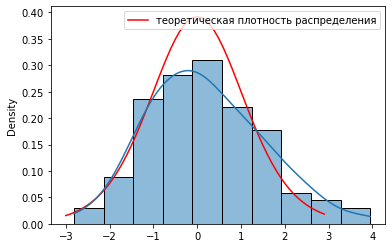

In [16]:
xs = np.arange(-3, 3, 0.1)
ys = student_dist(xs, n)
plt.plot(xs, ys, c="red", label = "теоретическая плотность распределения")
sns.histplot(student_d, stat = "density", kde = True)
plt.legend()
None

In [17]:
table_hist5 = generate_table_hist(student_d)
def integrate_student(upper, n):
    lower = -1000
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = student_dist(arrx, n)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S
def chisq_test_student(table_hist_st, n):
    N = sum(table_hist_st.abs_freq)
    pract = table_hist_st.abs_freq
    theor = np.empty(table_hist_st.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_student(table_hist_st.upp.iloc[i], n) - integrate_student(table_hist_st.low.iloc[i], n))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Student dist -",chisq_test_student(table_hist5, n) < st1.chi2.ppf(0.95, n_groups - 2))
print(chisq_test_student(table_hist5, n), st1.chi2.ppf(0.95, n_groups-2))

Student dist - True
7.248581500615148 11.070497693516351
